In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
X = pd.read_csv('D:\Data Science\Linear_X_train.csv')
X.head()

x
0 -0.289307
1 -0.588810
2  1.027507
3 -0.259013
4  0.782043

In [34]:
Y = pd.read_csv('D:\Data Science\Linear_Y_train.csv')
Y.head()

y
0  -0.091101
1 -53.467721
2  75.457009
3 -12.025286
4  57.414187

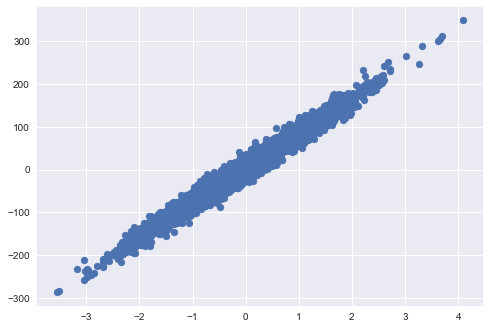

In [35]:
plt.style.use('seaborn')
plt.scatter(X,Y)
plt.show()

In [36]:
# Convert X and Y to numpy arrays
X = X.values
Y = Y.values
# Normalisation
u = X.mean()
std = X.std()
print(X.shape,Y.shape)

(3750, 1) (3750, 1)


In [6]:
print(u,std)

-0.03779466168006855 0.9920801322508517


(array([  13.,   73.,  323.,  808., 1124.,  902.,  385.,  108.,   10.,
           4.]),
 array([-3.54629935, -2.78253014, -2.01876093, -1.25499172, -0.4912225 ,
         0.27254671,  1.03631592,  1.80008513,  2.56385434,  3.32762355,
         4.09139276]),
 <BarContainer object of 10 artists>)

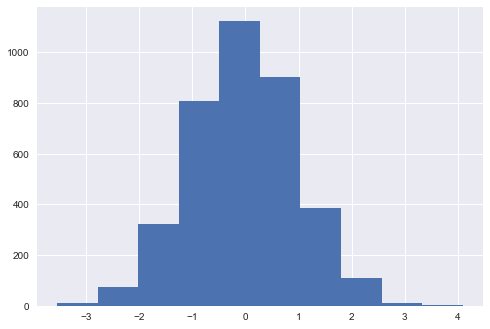

In [7]:
plt.hist(X)

# Linear Regression

In [8]:
def Hypothesis(X,theta):
    Y_ = theta[0]+theta[1]*X
    return Y_

def Gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        y_ = Hypothesis(X[i],theta)
        y = Y[i]
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*X[i]
        
    return grad/m

def Error(X,Y,theta):
    total_error = 0.0
    m = X.shape[0]
    for i in range(m):
        y_ = Hypothesis(X[i],theta)
        y = Y[i]
        total_error += (y_ - y)**2
    return total_error/m

def GradientDescent(X,Y,learning_rate = 0.1,max_steps=100):
    error_list = []
    theta_list = []
    m = X.shape[0]
    theta = np.zeros((2,))
    for i in range(max_steps):
        e = Error(X,Y,theta)
        error_list.append(e)
        grad = Gradient(X,Y,theta)
        
        theta[0] = theta[0] - learning_rate * grad[0]
        theta[1] = theta[1] - learning_rate * grad[1]
        theta_list.append((theta[0],theta[1]))
        
    return theta,error_list,theta_list

In [9]:
theta,error_list,theta_list = GradientDescent(X,Y)

In [10]:
theta

array([ 3.72687896, 80.54086647])

In [11]:
error_list

[array([6576.35005246]),
 array([5382.10116306]),
 array([4411.49946152]),
 array([3622.60756627]),
 array([2981.36244807]),
 array([2460.09492819]),
 array([2036.32790862]),
 array([1691.80078718]),
 array([1411.67742971]),
 array([1183.90311642]),
 array([998.68240386]),
 array([848.05513558]),
 array([725.55212733]),
 array([625.91553452]),
 array([544.87173451]),
 array([478.94684832]),
 array([425.31688589]),
 array([381.68600791]),
 array([346.18762175]),
 array([317.30402305]),
 array([293.8011006]),
 array([274.67527734]),
 array([259.1103913]),
 array([246.44265199]),
 array([236.13215782]),
 array([227.7397446]),
 array([220.90816592]),
 array([215.34679392]),
 array([210.819181]),
 array([207.13294679]),
 array([204.13155518]),
 array([201.6876277]),
 array([199.69750573]),
 array([198.07682823]),
 array([196.75693483]),
 array([195.6819403]),
 array([194.80635471]),
 array([194.09314753]),
 array([193.51217265]),
 array([193.03888696]),
 array([192.65330781]),
 array([192.3

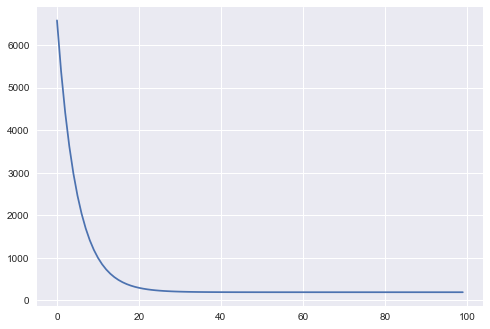

In [12]:
plt.plot(error_list)
plt.show()

# Predictions

In [13]:
y_ = Hypothesis(X,theta)
print(y_)

[[-19.57419108]
 [-43.69635897]
 [ 86.48322254]
 ...
 [-20.85126634]
 [138.69991375]
 [-35.87967507]]


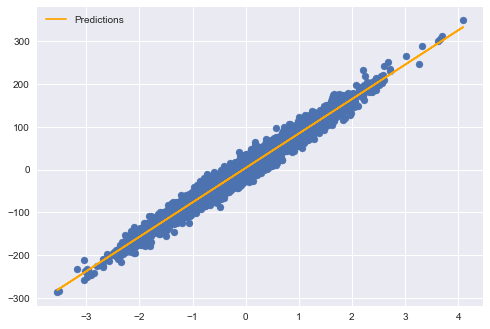

In [14]:
plt.scatter(X,Y)
plt.plot(X,y_,color = "orange",label = "Predictions")
plt.legend()
plt.show()

In [15]:
X_test = pd.read_csv('D:\Data Science\Linear_X_Test.csv').values
y_test = Hypothesis(X_test,theta)

In [16]:
df = pd.DataFrame(data=y_test,columns = ["Y"])

In [17]:
df.to_csv('Y_Prediction.csv',index=False)

In [18]:
def r2_scored (Y,Y_):
    Avg = np.mean(Y)
    sum1 = np.sum((Y-Y_)**2)
    denom = np.sum((Y- Avg)**2)
    
    R2 = 1 - (sum1/denom)
    
    return R2*100

In [19]:
r2_scored(Y,y_)

97.09612220841039

# Surface plots

In [20]:
# loss function shapes

theta

array([ 3.72687896, 80.54086647])

In [21]:
T0 = np.arange(-50,50,1)
T1 = np.arange(40,120,1)

In [22]:
T0

array([-50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38,
       -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25,
       -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12,
       -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,
         2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49])

In [23]:
T1

array([ 40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119])

In [24]:
T0,T1 = np.meshgrid(T0,T1)
J = np.zeros(T0.shape)

In [25]:
m = X.shape[0]
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_ = T1[i,j]*X + T0[i,j]
        J[i,j] = np.sum((y_-Y)**2)/m
        

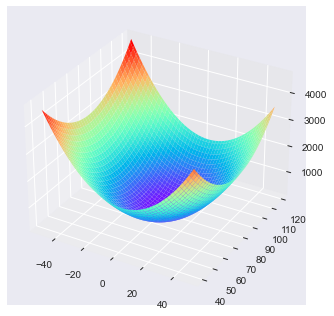

In [26]:
fig = plt.figure()
axes = fig.gca(projection="3d")
axes.plot_surface(T0,T1,J,cmap = "rainbow")
plt.show()

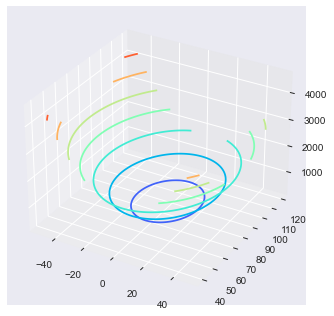

In [27]:
fig = plt.figure()
axes = fig.gca(projection="3d")
axes.contour(T0,T1,J,cmap = "rainbow")
plt.show()

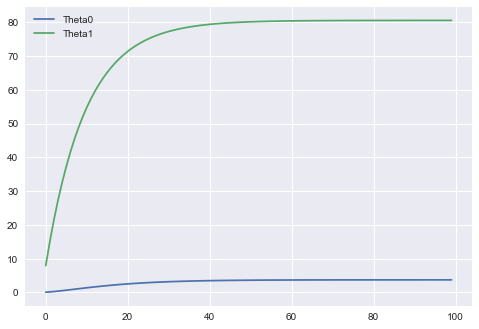

In [28]:
theta_list = np.array(theta_list)
plt.plot(theta_list[:,0],label="Theta0")
plt.plot(theta_list[:,1],label="Theta1")
plt.legend()
plt.show()

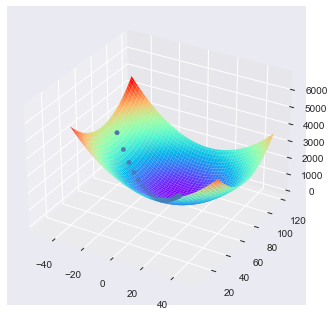

In [29]:
fig = plt.figure()
axes = fig.gca(projection="3d")
axes.plot_surface(T0,T1,J,cmap = "rainbow")
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

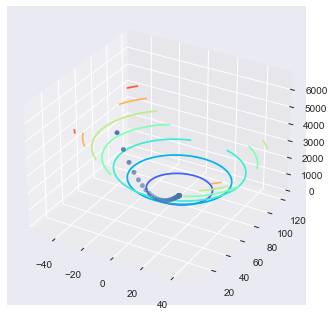

In [30]:
fig = plt.figure()
axes = fig.gca(projection="3d")
axes.contour(T0,T1,J,cmap = "rainbow")
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

In [31]:
np.save('ThetaList.npy',theta_list)